<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_002_examples/_001_first_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
# !unzip '/content/drive/My Drive/Colab Notebooks/data/programmers_v2/train_job.zip' -d '/content/drive/My Drive/Colab Notebooks/data/programmers_v2/'

In [6]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [7]:
data_dir_path = '/content/drive/My Drive/Colab Notebooks/data/programmers_v2/'

In [8]:
import pandas as pd

def cp(s):
  return "{}{}".format(data_dir_path, s)

tags_df = pd.read_csv(cp('tags.csv'))
train_df = pd.read_csv(cp('train.csv'))
user_tag_df = pd.read_csv(cp('user_tags.csv'))
job_companies_df = pd.read_csv(cp('job_companies.csv'))
job_tag_df = pd.read_csv(cp('job_tags.csv'))

In [51]:
tags_df.sample(5)

,tagID,keyword
31,8e2cfdc275761edc592f73a076197c33,Webpack
233,56468d5607a5aaf1604ff5e15593b003,AWS ElastiCache
446,24146db4eb48c718b84cae0a0799dcfc,Protocol Buffers
624,573eec40e4ef4f2089531dd5cbf629f8,Knockout.js
884,c2aee86157b4a40b78132f1e71a9e6f1,*


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


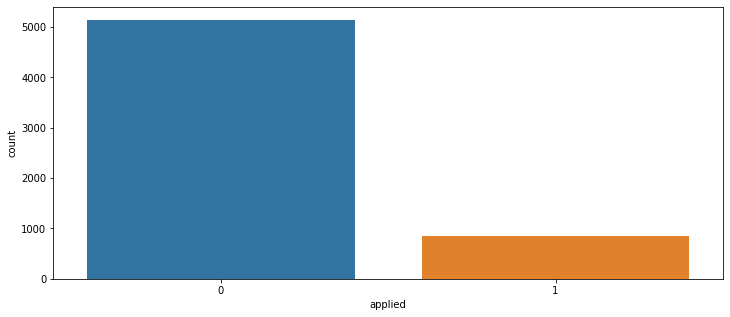

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(train_df['applied'])

In [11]:
a = job_tag_df.groupby('jobID')
a.jobID.value_counts()

jobID                             jobID                           
00ac8ed3b4327bdd4ebbebcb2ba10a00  00ac8ed3b4327bdd4ebbebcb2ba10a00     7
00e26af6ac3b1c1c49d7c3d79c60d000  00e26af6ac3b1c1c49d7c3d79c60d000    12
00ec53c4682d36f5c4359f4ae7bd7ba1  00ec53c4682d36f5c4359f4ae7bd7ba1     4
013a006f03dbc5392effeb8f18fda755  013a006f03dbc5392effeb8f18fda755     3
0188e8b8b014829e2fa0f430f0a95961  0188e8b8b014829e2fa0f430f0a95961     3
                                                                      ..
fed33392d3a48aa149a87a38b875ba4a  fed33392d3a48aa149a87a38b875ba4a     5
ff4d5fbbafdf976cfdc032e3bde78de5  ff4d5fbbafdf976cfdc032e3bde78de5     4
ffd52f3c7e12435a724a8f30fddadd9c  ffd52f3c7e12435a724a8f30fddadd9c     4
ffeabd223de0d4eacb9a3e6e53e5448d  ffeabd223de0d4eacb9a3e6e53e5448d     3
ffeed84c7cb1ae7bf4ec4bd78275bb98  ffeed84c7cb1ae7bf4ec4bd78275bb98     2
Name: jobID, Length: 733, dtype: int64

In [58]:
tags_df[tags_df['tagID'] == '8e2cfdc275761edc592f73a076197c33']['keyword'].values[0]

'Webpack'

In [63]:
def grouping_tags(df: pd.DataFrame, id: str) -> {}:
    result = []
    for u, t in df.groupby(id):
      temp = {}
      temp[id] = u
      temp['{}_tags'.format(id)] = ",".join(df[df[id] == u]['tagID'].apply(lambda x: tags_df[tags_df['tagID'] == x]['keyword'].values[0]))
      result.append(temp)

    return pd.DataFrame(result)

In [64]:
job_match_df = grouping_tags(job_tag_df, 'jobID')
job_match_df.head(2)

,jobID,jobID_tags
0,00ac8ed3b4327bdd4ebbebcb2ba10a00,"Git,Android,Java,Firebase,REST API,Kotlin,RxJava"
1,00e26af6ac3b1c1c49d7c3d79c60d000,"Kotlin,Python,iOS,Node.js,Java,Angular,Android..."


In [66]:
user_match_df = grouping_tags(user_tag_df, 'userID')
user_match_df.sample(2)

,userID,userID_tags
62,5bfbe18286921673dbb4c9fa80f0734b,"Java,JavaScript,Apache Struts,Java,Java,Apache..."
94,7e5c43aee3b770da0c9be62c298971cc,"MySQL,JavaScript,JavaScript,JavaScript,Java,Ja..."


# train 데이터에 job과 user tag 삽입

In [67]:
merge_user = pd.merge(train_df, user_match_df, how='left')
complete_merge = pd.merge(merge_user, job_match_df, how='left')

# 정규화 필요

In [70]:
complete_merge[complete_merge['applied'] == 1]

,userID,jobID,applied,userID_tags,jobID_tags
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,"Raspberry Pi,Android,Cuckoo Sandbox,Facebook A...","Swift,Android,iOS"
23,b052e2e0c0ad1b2d5036bd56e27d061c,4a213d37242bdcad8e7300e202e7caa4,1,"Spring Data,Apache Maven,H2 Database,CSS,JSP,A...","Node.js,MySQL,Redis,MongoDB,Java,Git"
24,a35af76a1c0bb174a3cfc66592804848,e820a45f1dfc7b95282d10b6087e11c0,1,"Responsive Web,Java,Responsive Web,Java,Google...","HTML,Vue.js,AngularJS,JavaScript,CSS,ReactJS"
29,cb08b2c94dbb772324444bb4ed7cc1a4,9b70e8fe62e40c570a322f1b0b659098,1,"AngularJS,jQuery,AngularJS,jQuery,JavaScript,G...","GCP(Google Cloud Platform),Elasticsearch,Java,..."
35,688da39dcb1131d0d91b348653850d08,b534ba68236ba543ae44b22bd110a1d6,1,"ReactJS,Linux,jQuery,PHP,JavaScript,jQuery,PHP...","Linux,PostgreSQL,ReactJS,JavaScript,Git,React ..."
...,...,...,...,...,...
5976,e3979074cac4d9393ebbd4c2a534a851,58d4d1e7b1e97b258c9ed0b37e02d087,1,"ExpressJS,PHP,HTML,Mongoose,MySQL,Raspberry Pi...","Node.js,Microservice Architecture,AWS Lambda,J..."
5981,6da6479250104018131de61655f1f385,851ddf5058cf22df63d3344ad89919cf,1,"Django,Selenium,Bootstrap,Ubuntu,Django,Seleni...","Ruby,JavaScript,Aurora DB,Vue.js,GitHub,Sass(S..."
5983,6bd22a86b1f7a3a11de928d301f86d67,758874998f5bd0c393da094e1967a72b,1,"Java,JavaScript,Node.js,Kotlin,Android,Android...","Java,Kotlin"
5985,2eeb9064f7f5b2569912cbb772a96438,24b16fede9a67c9251d3e7c7161c83ac,1,"JavaScript,SQLite,Python,JavaScript,JavaScript...","PostgreSQL,Redis,Ruby on Rails,Memcached,Datab..."


In [71]:
complete_merge['job_tags_split'] = complete_merge['jobID_tags'].apply(lambda x: x.split(","))
complete_merge['user_tags_split'] = complete_merge['userID_tags'].apply(lambda x: x.split(","))

In [72]:
complete_merge

,userID,jobID,applied,userID_tags,jobID_tags,job_tags_split,user_tags_split
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,"MongoDB,Docker,Java,Jenkins,ExpressJS,OpenCV,S...","Ruby on Rails,Ruby","[Ruby on Rails, Ruby]","[MongoDB, Docker, Java, Jenkins, ExpressJS, Op..."
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,"Java,Apache Tomcat,HTML5,ReactJS,Apache Spark,...","AWS DynamoDB,Python,MySQL","[AWS DynamoDB, Python, MySQL]","[Java, Apache Tomcat, HTML5, ReactJS, Apache S..."
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,"Raspberry Pi,Android,Cuckoo Sandbox,Facebook A...","Swift,Android,iOS","[Swift, Android, iOS]","[Raspberry Pi, Android, Cuckoo Sandbox, Facebo..."
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,"MariaDB,Raspberry Pi,HTML,TypeScript,Flask,And...","JavaScript,React Native,ReactJS,TypeScript,Vue.js","[JavaScript, React Native, ReactJS, TypeScript...","[MariaDB, Raspberry Pi, HTML, TypeScript, Flas..."
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,"Spring,AWS EC2,CSS3,KakaoPay API,Spring Data J...","Python,ReactJS,JavaScript,Webpack","[Python, ReactJS, JavaScript, Webpack]","[Spring, AWS EC2, CSS3, KakaoPay API, Spring D..."
...,...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,"Apache Maven,Java,Redux.js,MongoDB,ES6,MySQL,P...","Java,JavaScript","[Java, JavaScript]","[Apache Maven, Java, Redux.js, MongoDB, ES6, M..."
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,"GitHub,Node.js,Redux.js,CSS,JavaScript,ReactJS...","ReactJS,Git,React Native,Objective-C,Android,J...","[ReactJS, Git, React Native, Objective-C, Andr...","[GitHub, Node.js, Redux.js, CSS, JavaScript, R..."
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,"JavaScript,Spring,Java,MySQL,JSP,MySQL,JSP,CSS...","Apache Kafka,MySQL,Java,Linux,CI/CD,AWS RDS,El...","[Apache Kafka, MySQL, Java, Linux, CI/CD, AWS ...","[JavaScript, Spring, Java, MySQL, JSP, MySQL, ..."
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,"ReactJS,TypeScript,Git,Git,ReactJS,TypeScript,...","JavaScript,ReactJS,Node.js,Webpack","[JavaScript, ReactJS, Node.js, Webpack]","[ReactJS, TypeScript, Git, Git, ReactJS, TypeS..."


In [20]:
complete_merge['userID_tags'].sample().apply(lambda x: x.split(",")).tolist()


[['4e8412ad48562e3c9934f45c3e144d48 2ba8698b79439589fdd2b0f7218d8b07 452bf208bf901322968557227b8f6efe c8ba76c279269b1c6bc8a07e38e78fa4 f47330643ae134ca204bf6b2481fec47 f47330643ae134ca204bf6b2481fec47 4e8412ad48562e3c9934f45c3e144d48 2ba8698b79439589fdd2b0f7218d8b07 452bf208bf901322968557227b8f6efe 4e8412ad48562e3c9934f45c3e144d48 f47330643ae134ca204bf6b2481fec47 c8ba76c279269b1c6bc8a07e38e78fa4 c8ba76c279269b1c6bc8a07e38e78fa4 2ba8698b79439589fdd2b0f7218d8b07 452bf208bf901322968557227b8f6efe f47330643ae134ca204bf6b2481fec47 4e8412ad48562e3c9934f45c3e144d48 2ba8698b79439589fdd2b0f7218d8b07 452bf208bf901322968557227b8f6efe 8f1d43620bc6bb580df6e80b0dc05c48 03f544613917945245041ea1581df0c2 f47330643ae134ca204bf6b2481fec47 4e8412ad48562e3c9934f45c3e144d48 c8ba76c279269b1c6bc8a07e38e78fa4 8f1d43620bc6bb580df6e80b0dc05c48 03f544613917945245041ea1581df0c2 2ba8698b79439589fdd2b0f7218d8b07 452bf208bf901322968557227b8f6efe c8ba76c279269b1c6bc8a07e38e78fa4']]

In [21]:
from sklearn.metrics.pairwise import euclidean_distances

def l1_normalize(v):
    return v / np.sum(v)

# euclidean_distances(tfidf_metric[:, :, 2], tfidf_metric[:, :, 1])

## 첫 번째 시도



In [22]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer
import numpy as np 

In [23]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(user_tag_df['userID'])
tokenizer.fit_on_texts(tags_df['tagID'])
tokenizer.fit_on_texts(job_companies_df['companyID'])
tokenizer.fit_on_texts(job_companies_df['jobID'])
tokenizer.fit_on_texts(job_companies_df['companySize'].fillna('0'))
# tag_sequences = tokenizer.texts_to_sequences(tags_df['tagID'])
tag_vocab = tokenizer.word_index

len(tag_vocab)
# tokenizer.texts_to_sequences()

1583

## 두 번째 시도


In [24]:
df_fit = complete_merge['userID_tags'].append(complete_merge['jobID_tags'])
df_fit

0       285ab9448d2751ee57ece7f762c39095 a1d50185e7426...
1       f47330643ae134ca204bf6b2481fec47 8f1d43620bc6b...
2       f91e24dfe80012e2a7984afa4480a6d6 aace49c7d8076...
3       7501e5d4da87ac39d782741cd794002d f91e24dfe8001...
4       2ba8698b79439589fdd2b0f7218d8b07 4e2545f819e67...
                              ...                        
5995    f47330643ae134ca204bf6b2481fec47 0e095e054ee94...
5996    81dc9bdb52d04dc20036dbd8313ed055 884d79963bd8b...
5997    b20bb95ab626d93fd976af958fbc61ba c8ba76c279269...
5998    0e095e054ee94774d6a496099eb1cf6a 81dc9bdb52d04...
5999    0e095e054ee94774d6a496099eb1cf6a a1d50185e7426...
Length: 12000, dtype: object

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
count_train = vectorizer.fit(df_fit)
bag_of_words = vectorizer.fit_transform(df_fit)
print(vectorizer.get_feature_names())
vocab = vectorizer.vocabulary_
print(bag_of_words.shape)
print(vocab)


['03e7ef47cee6fa4ae7567394b99912b7', '03f544613917945245041ea1581df0c2', '045117b0e0a11a242b9765e79cbf113f', '063e26c670d07bb7c4d30e6fc69fe056', '06eb61b839a0cefee4967c67ccb099dc', '07042ac7d03d3b9911a00da43ce0079a', '07563a3fe3bbe7e3ba84431ad9d055af', '076023edc9187cf1ac1f1163470e479a', '07cb5f86508f146774a2fac4373a8e50', '0a09c8844ba8f0936c20bd791130d6b6', '0c048b3a434e49e655c1247efb389cec', '0c8ce55163055c4da50a81e0a273468c', '0ce2ffd21fc958d9ef0ee9ba5336e357', '0d7de1aca9299fe63f3e0041f02638a3', '0e095e054ee94774d6a496099eb1cf6a', '0e9fa1f3e9e66792401a6972d477dcc3', '0eec27c419d0fe24e53c90338cdc8bc6', '0efe32849d230d7f53049ddc4a4b0c60', '0f2c9a93eea6f38fabb3acb1c31488c6', '109d2dd3608f669ca17920c511c2a41e', '1113d7a76ffceca1bb350bfe145467c6', '11c484ea9305ea4c7bb6b2e6d570d466', '123b7f02433572a0a560e620311a469c', '130f1a8e9e102707f3f91b010f151b0b', '1368ba1ab6ed38bb1f26f36673739d54', '144a3f71a03ab7c4f46f9656608efdb2', '147702db07145348245dc5a2f2fe5683', '149815eb972b3c370dee3b89d6

15

In [34]:
bag_of_words.data

array([0.187183  , 0.16919437, 0.27042496, ..., 0.50194255, 0.25669354,
       0.50613193])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier()
decision.fit()

유저의 태그를 문자열로 붙여 `새로운 컬럼`에 추가한다.

job의 태그를 문자열로 붙여 `새로운 컬럼`에 추가한다.

companies를 벡터화에 추가한다.

job의 `새로운 컬럼`에 company를 덧붙인다.